# Underfitting & Overfitting


In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
from keras.datasets import imdb
import numpy as np

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Fighting overfitting
Reducing the network's size

In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))




Train on 25000 samples, validate on 25000 samples
Epoch 1/20





25000/25000 [==============================] - 11s 430us/step - loss: 0.4440 - acc: 0.8244 - val_loss: 0.3288 - val_acc: 0.8846
Epoch 2/20
25000/25000 [==============================] - 9s 345us/step - loss: 0.2575 - acc: 0.9079 - val_loss: 0.2855 - val_acc: 0.8891
Epoch 3/20
25000/25000 [==============================] - 6s 249us/step - loss: 0.1992 - acc: 0.9290 - val_loss: 0.2822 - val_acc: 0.8886
Epoch 4/20
25000/25000 [==============================] - 6s 247us/step - loss: 0.1663 - acc: 0.9414 - val_loss: 0.2943 - val_acc: 0.8842
Epoch 5/20
25000/25000 [==============================] - 6s 249us/step - loss: 0.1425 - acc: 0.9504 - val_loss: 0.3121 - val_acc: 0.8806
Epoch 6/20
25000/25000 [==============================] - 7s 280us/step - loss: 0.1245 - acc: 0.9567 - val_loss: 0.3524 - val_acc: 0.8712
Epoch 7/20
25000/25000 [==============================] - 7s 291us/step - loss: 0.1095 - acc: 0.9628 - val_loss: 

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 8s 336us/step - loss: 0.5804 - acc: 0.7030 - val_loss: 0.5307 - val_acc: 0.7566
Epoch 2/20
25000/25000 [==============================] - 6s 244us/step - loss: 0.4842 - acc: 0.8452 - val_loss: 0.4870 - val_acc: 0.8305
Epoch 3/20
25000/25000 [==============================] - 6s 256us/step - loss: 0.4388 - acc: 0.8927 - val_loss: 0.4660 - val_acc: 0.8507
Epoch 4/20
25000/25000 [==============================] - 6s 254us/step - loss: 0.4077 - acc: 0.9156 - val_loss: 0.4537 - val_acc: 0.8631
Epoch 5/20
25000/25000 [==============================] - 7s 261us/step - loss: 0.3832 - acc: 0.9306 - val_loss: 0.4541 - val_acc: 0.8586
Epoch 6/20
25000/25000 [==============================] - 7s 267us/step - loss: 0.3620 - acc: 0.9413 - val_loss: 0.4439 - val_acc: 0.8710
Epoch 7/20
25000/25000 [==============================] - 7s 289us/step - loss: 0.3427 - acc: 0.9510 - val_loss: 0.4508 - 

In [7]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

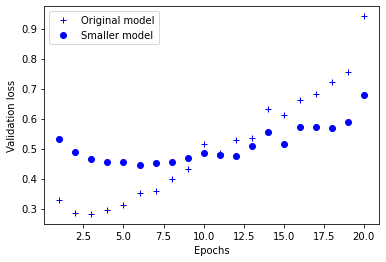

In [8]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [9]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [10]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 20s 817us/step - loss: 0.4675 - acc: 0.7956 - val_loss: 0.2825 - val_acc: 0.8879
Epoch 2/20
25000/25000 [==============================] - 19s 775us/step - loss: 0.2241 - acc: 0.9119 - val_loss: 0.2990 - val_acc: 0.8761
Epoch 3/20
25000/25000 [==============================] - 20s 785us/step - loss: 0.1350 - acc: 0.9493 - val_loss: 0.3734 - val_acc: 0.8516
Epoch 4/20
25000/25000 [==============================] - 20s 815us/step - loss: 0.0605 - acc: 0.9814 - val_loss: 0.4022 - val_acc: 0.8830
Epoch 5/20
25000/25000 [==============================] - 21s 822us/step - loss: 0.0974 - acc: 0.9842 - val_loss: 0.4536 - val_acc: 0.8796
Epoch 6/20
25000/25000 [==============================] - 21s 838us/step - loss: 0.0020 - acc: 0.9999 - val_loss: 0.6161 - val_acc: 0.8805
Epoch 7/20
25000/25000 [==============================] - 21s 824us/step - loss: 0.1152 - acc: 0.9887 - val_loss: 0.

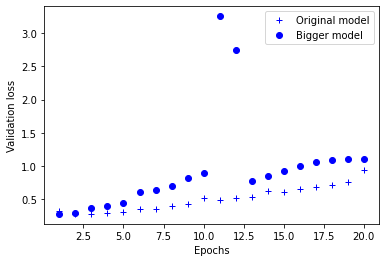

In [11]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

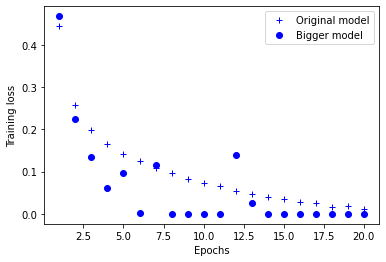

In [12]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

## Adding weight regularization

In [13]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [15]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 8s 303us/step - loss: 0.4887 - acc: 0.8152 - val_loss: 0.3899 - val_acc: 0.8655
Epoch 2/20
25000/25000 [==============================] - 7s 272us/step - loss: 0.3102 - acc: 0.9057 - val_loss: 0.3304 - val_acc: 0.8891
Epoch 3/20
25000/25000 [==============================] - 7s 271us/step - loss: 0.2648 - acc: 0.9207 - val_loss: 0.3298 - val_acc: 0.8872
Epoch 4/20
25000/25000 [==============================] - 7s 266us/step - loss: 0.2449 - acc: 0.9295 - val_loss: 0.3404 - val_acc: 0.8820
Epoch 5/20
25000/25000 [==============================] - 7s 268us/step - loss: 0.2311 - acc: 0.9352 - val_loss: 0.3805 - val_acc: 0.8687
Epoch 6/20
25000/25000 [==============================] - 7s 261us/step - loss: 0.2225 - acc: 0.9389 - val_loss: 0.3650 - val_acc: 0.8756
Epoch 7/20
25000/25000 [==============================] - 6s 257us/step - loss: 0.2155 - acc: 0.9415 - val_loss: 0.3766 - 

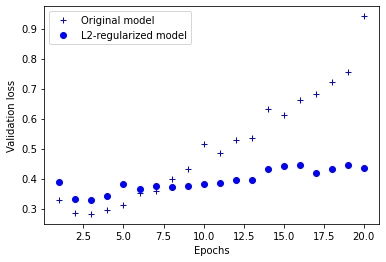

In [16]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [17]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)